# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load and explore dataset

In [3]:
from google.colab import drive

drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fundamentals_of_ML/mini_project/icml_face_data.csv")
df.head()

Mounted at /content/drive


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
emotion    0
pixels     0
dtype: int64


In [6]:
# Check for outliers in emotion (assuming valid emotions are 0-9)
q1 = df['emotion'].quantile(0.25)
q3 = df['emotion'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['emotion'] < lower_bound) | (df['emotion'] > upper_bound)]
print(f"Number of outliers in emotion: {len(outliers)}")


Number of outliers in emotion: 0


In [7]:
# Check for duplicates
print("Duplicates:")
print(df.duplicated().sum())

Duplicates:
1793


In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34094 entries, 0 to 34093
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  34094 non-null  int64 
 1   pixels   34094 non-null  object
dtypes: int64(1), object(1)
memory usage: 532.8+ KB


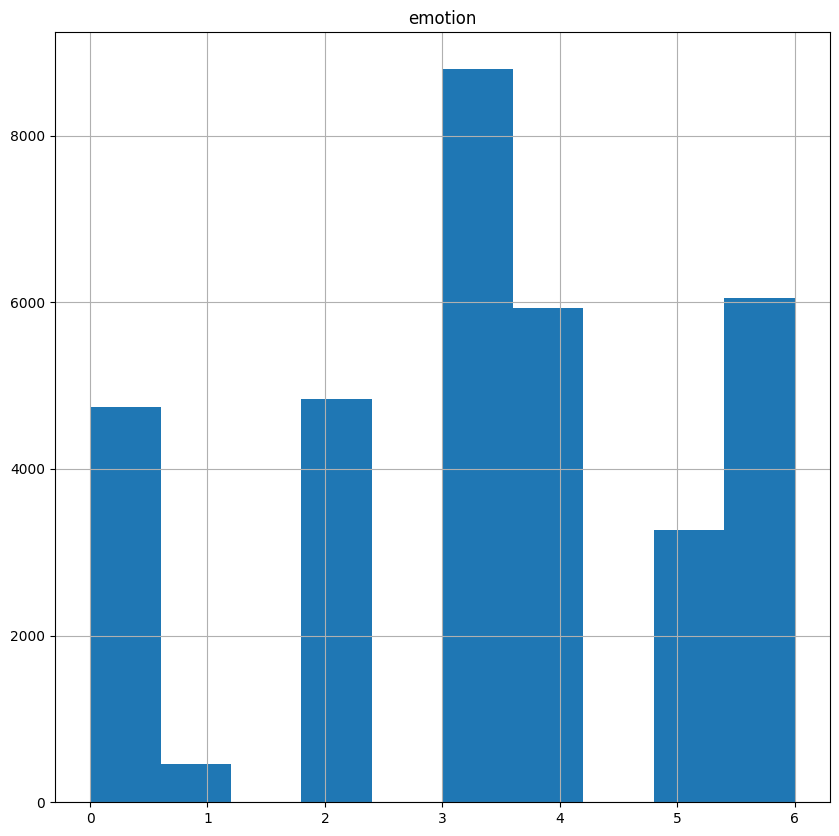

In [9]:
# Visualize data distribution (optional)
df.hist(figsize=(10, 10))
plt.show()


### Preproccessing Data

In [10]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [11]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [12]:
## parsing data here
images, labels = parse_data(df)


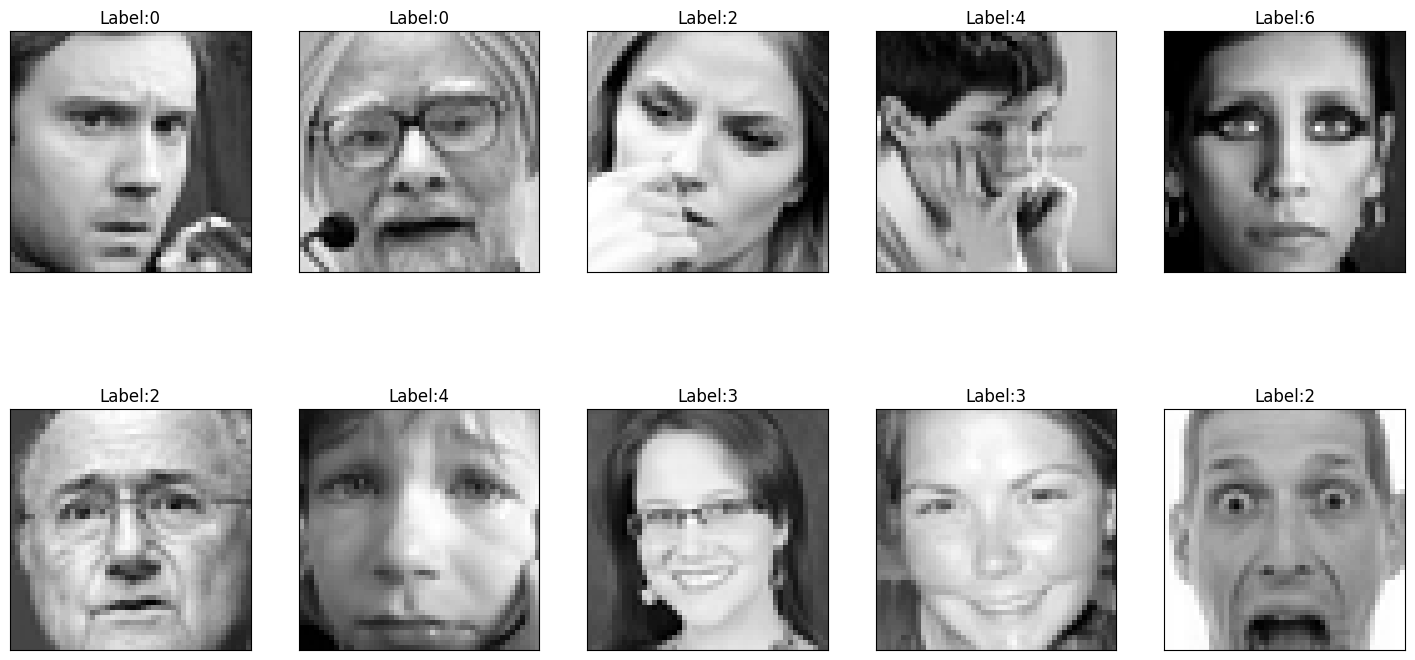

In [13]:
## showing images here
show_img(images, labels)

In [14]:
images.shape

(34094, 48, 48)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

**Answer 1:**

I cannot **directly** visualize the data projected from 48x48 onto 2 principal components because it loss many inportant infomation of imange. To solve this problem we can use PCA, PCA helps find the principal components that contain the most information from the data.

Imagine a high-dimensional space where each pixel of your image represents a data point. When you perform PCA, you essentially find new axes (principal components) that capture the most variance in this data. These axes are perpendicular to each other.




(34094, 2)


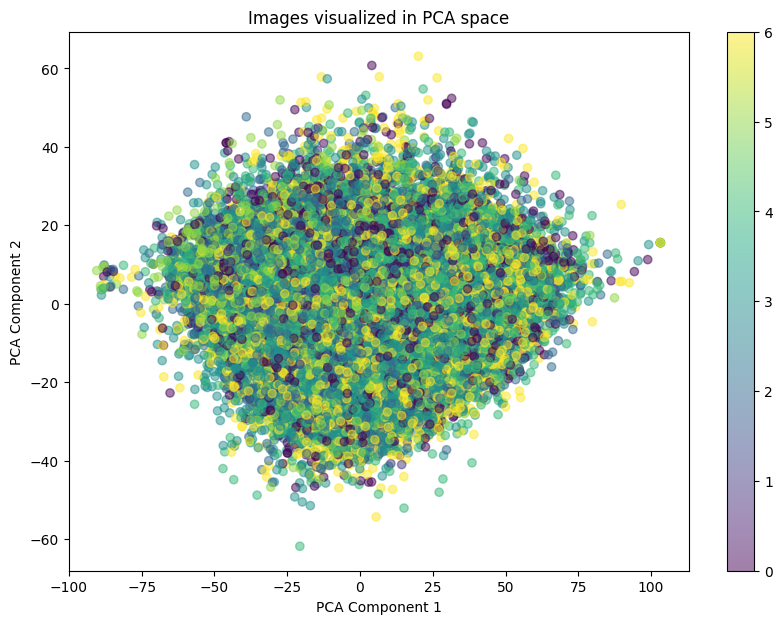

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Reshape the images array for PCA
X_reshape = images.reshape(images.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshape)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transform for visualizing here
images_pca = pca.transform(X_scaled)
print(images_pca.shape)  # Should print (num_images, 2)

# Optionally, you can visualize the transformed images in the PCA space
plt.figure(figsize=(10, 7))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('Images visualized in PCA space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [16]:
print('shape of image before pca', images.shape)
print("shape of image after pca", images_pca.shape)

shape of image before pca (34094, 48, 48)
shape of image after pca (34094, 2)


In [17]:
images_labels=pd.DataFrame(images_pca)
images_labels['label']=labels
images_labels.head()

,0,1,label
0,6.364390,-12.246876,0
1,4.235178,12.715393,0
2,-27.809900,-16.906367,2
3,1.773471,17.780073,4
4,17.902437,-28.381200,6


Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

Answer 2:

The goal of PCA is to reduce the dimensionality of the data while retaining most of the original information. So, a question arises: *how many principal components should be chosen to retain the most data?*

Explained variance indicates the percentage of the total variance in the data that each principal component accounts for. When we calculate the cumulative explained variance, we can see the amount of information retained as more principal components are added

To determine the optimal number of components for different thresholds, I identified the points where the cumulative explained variance exceeds these thresholds (90%, 95%, 99%). The result is the optimal number of principal components for each threshold


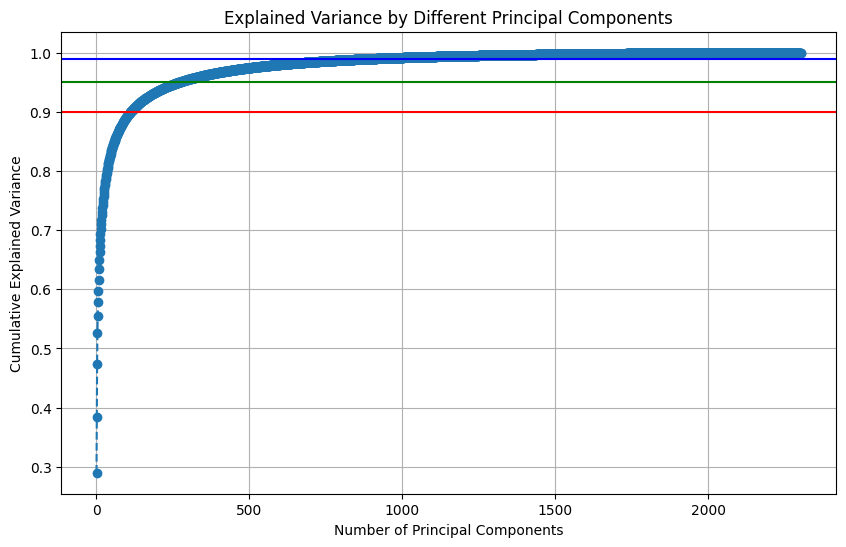

Optimal number of components for different explained variance thresholds:
90.0% explained variance: 113 components
95.0% explained variance: 271 components
99.0% explained variance: 906 components


In [18]:
# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.95, color='g', linestyle='-')
plt.axhline(y=0.99, color='b', linestyle='-')
plt.show()

# Determine the optimal number of components for different thresholds
thresholds = [0.90, 0.95, 0.99]
optimal_components = {threshold: np.argmax(cumulative_explained_variance >= threshold) + 1 for threshold in thresholds}

print("Optimal number of components for different explained variance thresholds:")
for threshold, n_components in optimal_components.items():
    print(f"{threshold*100}% explained variance: {n_components} components")


Look for *The elbow point* - where the explained variance ratio starts to sharply decrease and levels off.

I choose n-conponents where explained variance is 95% corresponding to the elbow point in the scree plot

In [19]:
# Select the optimal number of components (e.g., 95% explained variance)
n_components_optimal = optimal_components[0.95]

# Transform the data using the optimal number of principal components
pca_optimal = PCA(n_components=n_components_optimal)
X_pca = pca_optimal.fit_transform(X_scaled)


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression  # Machine Learning Model 1
from sklearn.ensemble import RandomForestClassifier  # Machine Learning Model 2
from sklearn.neural_network import MLPClassifier  # Deep Learning Model 3 (MLP)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
import seaborn as sns


# Split the data into training and testing sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_reshape, labels, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

# Define parameter grids for each classifier
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 12]
}
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

# Create GridSearchCV instances for each classifier
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=5)

# Create classifiers dictionary with GridSearchCV objects
classifiers = {
    'Random Forest': grid_search_rf,
    'Logistic Regression': grid_search_lr,
    'MLP': grid_search_mlp
}


# Function to perform GridSearchCV and evaluate the model
def evaluate_model(clf, param_grid, X_train, X_test, y_train, y_test):
    # Note: param_grid is not used directly here because clf is already a GridSearchCV instance
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    duration = end_time - start_time

    return best_model, accuracy, precision, recall, f1, duration, y_pred


Performance on Original Data:
--- Random Forest ---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4018184484528523, Precision: 0.4248077553092755, Recall: 0.4018184484528523, F1-Score: 0.35383617288172825, Time: 6243.147451877594

Performance on PCA-Transformed Data:
--- Random Forest ---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3309869482328787, Precision: 0.3957889051800682, Recall: 0.3309869482328787, F1-Score: 0.2515410884694645, Time: 3601.7943205833435

Confusion Matrices for Original Data:


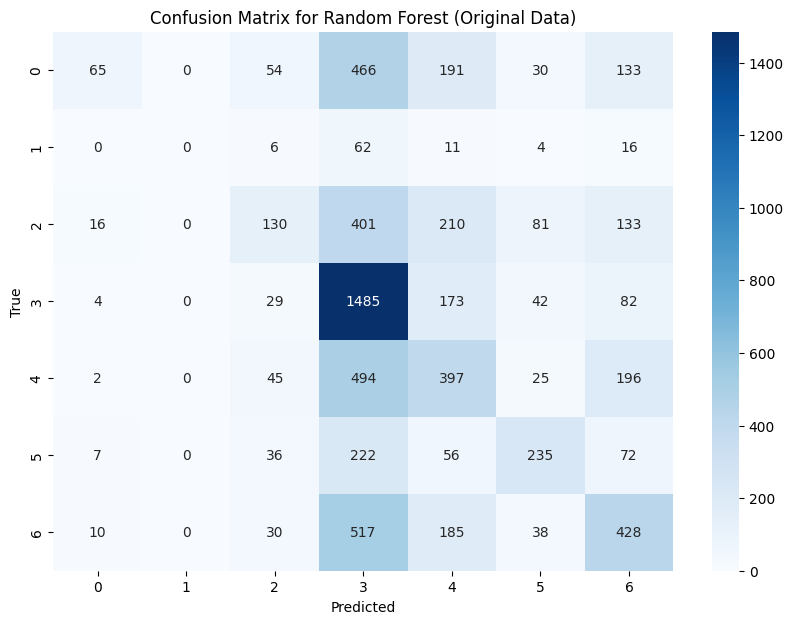


Confusion Matrices for PCA-Transformed Data:


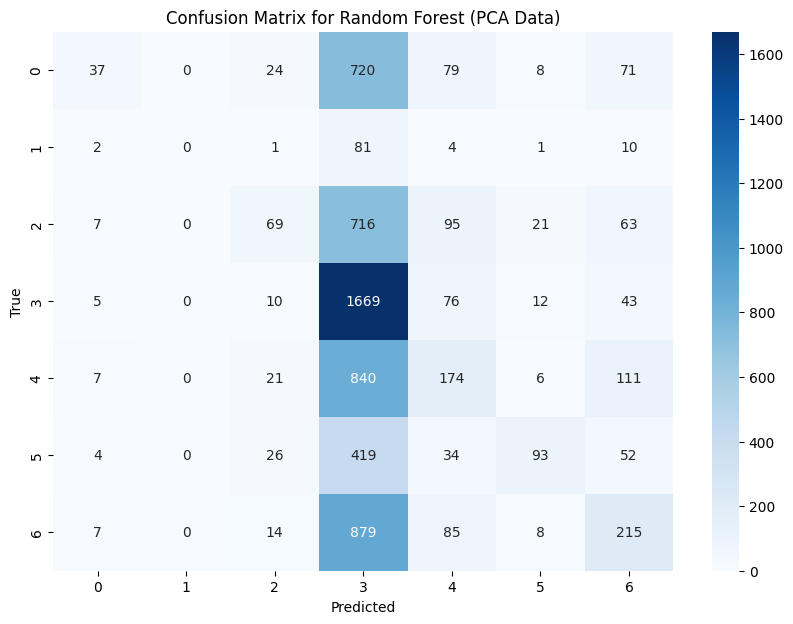

In [21]:
# Evaluate classifiers on original data
results_orig = {}
print("Performance on Original Data:")
for name, clf in classifiers.items():
    print(f"--- {name} ---")
    best_model, accuracy, precision, recall, f1, duration, y_pred_orig = evaluate_model(clf, None, X_train_orig, X_test_orig, y_train, y_test)
    results_orig[name] = (best_model, accuracy, precision, recall, f1, duration, y_pred_orig)
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}, Time: {duration}")

# Evaluate classifiers on PCA-transformed data
results_pca = {}
print("\nPerformance on PCA-Transformed Data:")
for name, clf in classifiers.items():
    print(f"--- {name} ---")
    best_model, accuracy, precision, recall, f1, duration, y_pred_pca = evaluate_model(clf, None, X_train_pca, X_test_pca, y_train, y_test)
    results_pca[name] = (best_model, accuracy, precision, recall, f1, duration, y_pred_pca)
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}, Time: {duration}")

# Function to visualize confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Visualize confusion matrices for each classifier
print("\nConfusion Matrices for Original Data:")
for name in results_orig:
    _, _, _, _, _, _, y_pred_orig = results_orig[name]
    plot_confusion_matrix(y_test, y_pred_orig, f'Confusion Matrix for {name} (Original Data)')

print("\nConfusion Matrices for PCA-Transformed Data:")
for name in results_pca:
    _, _, _, _, _, _, y_pred_pca = results_pca[name]
    plot_confusion_matrix(y_test, y_pred_pca, f'Confusion Matrix for {name} (PCA Data)')


* The time taken for processing is significantly higher for the original data (6243.15 seconds vs 3601.79 seconds for PCA data), suggesting that PCA reduces dimensionality but also speeds up computation.
* The model's performance metrics (accuracy, precision, recall, and F1-score) are generally lower compared to using the original data.
* This trade-off is typical in machine learning tasks where dimensionality reduction sacrifices some predictive performance for computational efficiency. The choice between using PCA-transcomputationformed data or original data depends on the specific needs of your application: whether computational efficiency or model performance metrics are more critical.

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [22]:
# Compare performance metrics
print("\nPerformance Comparison:")
for name in results_orig:
    _, acc_orig, prec_orig, rec_orig, f1_orig, time_orig, _ = results_orig[name]
    _, acc_pca, prec_pca, rec_pca, f1_pca, time_pca, _ = results_pca[name]
    print(f"--- {name} ---")
    print(f"Original Data - Accuracy: {acc_orig}, Precision: {prec_orig}, Recall: {rec_orig}, F1-Score: {f1_orig}, Time: {time_orig}")
    print(f"PCA Data - Accuracy: {acc_pca}, Precision: {prec_pca}, Recall: {rec_pca}, F1-Score: {f1_pca}, Time: {time_pca}")

# Determine the best model based on evaluation metrics
best_model_name = None
best_f1_score = 0

for name in results_orig:
    _, _, _, _, f1_pca, _, _ = results_pca[name]
    if f1_pca > best_f1_score:
        best_f1_score = f1_pca
        best_model_name = name

print(f"\nThe best model based on F1-Score on PCA data is: {best_model_name} with F1-Score: {best_f1_score}")

# Identify the emotion category where the best model makes the most accurate and most errors
best_model, _, _, _, _, _, y_pred_best = results_pca[best_model_name]
report = classification_report(y_test, y_pred_best, output_dict=True)
accuracies = {label: report[label]['precision'] for label in report if label.isdigit()}
most_accurate_label = max(accuracies, key=accuracies.get)
least_accurate_label = min(accuracies, key=accuracies.get)

print(f"\nThe emotion category with the most accurate predictions is: {most_accurate_label}")
print(f"The emotion category with the most errors is: {least_accurate_label}")



Performance Comparison:
--- Random Forest ---
Original Data - Accuracy: 0.4018184484528523, Precision: 0.4248077553092755, Recall: 0.4018184484528523, F1-Score: 0.35383617288172825, Time: 6243.147451877594
PCA Data - Accuracy: 0.3309869482328787, Precision: 0.3957889051800682, Recall: 0.3309869482328787, F1-Score: 0.2515410884694645, Time: 3601.7943205833435

The best model based on F1-Score on PCA data is: Random Forest with F1-Score: 0.2515410884694645

The emotion category with the most accurate predictions is: 5
The emotion category with the most errors is: 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
